(array([  3.,   5.,  17.,  42., 127., 235., 337., 543., 685., 709., 658.,
        602., 417., 282., 171.,  97.,  42.,  20.,   4.,   4.]),
 array([-0.03584356, -0.03218802, -0.02853247, -0.02487693, -0.02122139,
        -0.01756585, -0.01391031, -0.01025477, -0.00659922, -0.00294368,
         0.00071186,  0.0043674 ,  0.00802294,  0.01167848,  0.01533403,
         0.01898957,  0.02264511,  0.02630065,  0.02995619,  0.03361173,
         0.03726727]),
 <a list of 20 Patch objects>)

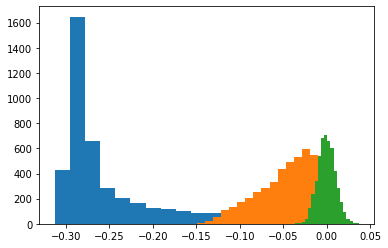

In [22]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81 #m/s
n = 5000

sd = []
Q = []
E = []
Z = []

sQ = []
sE = []
sZ = []

for j in range(5000):
    b0 = np.random.random()*10. ; db = np.random.random()*b0*0.1
    c0 = -np.random.random()*10.; dc = -np.random.random()*c0*0.1

    D0 = b0**2-4*c0

    # b0 is a negative number ( = 2v_0y/(-g) )
    # c0 is a negative number ( = 2(-Dy)/(-g) and Dy is negative)
    x0 = 0.5*(b0+D0**(0.5))

    vy = g*b0/2,
    #db = 1. ; dc = 1.
    #print('For this run,               v_y was {:.3f} m/s'.format(g*b0/2))
    #print('                            Dy  was {:.3f} m'.format(-g*c0/2))
    #print('And the computed time of flight was {:.3f} s'.format(x0))
    #print('================================================')
    #print('Uncertainty in b: {:.3f}'.format(db))
    #print('Uncertainty in c: {:.3f}'.format(dc))
    #Q is the "naiive sophisticated method (eqn 14)
    Q.append(((2*(b0**2)-4*c0)*(db)**2+4*(dc)**2)/(4*D0))
    #E is an empirical attempt to get better results (eqn 19)
    E.append(((4*(b0**2)-4*c0)*(db)**2+4*(dc)**2)/(4*D0))
    #Z is the calculus-based result (eqn 18)
    Z.append(((2*(b0**2)-4*c0+2*b0*D0**0.5)*(db)**2+4*(dc)**2)/(4*D0))
    x = []
    for i in range(n):
      b = np.random.normal(loc=b0,scale=db)
      c = np.random.normal(loc=c0,scale=dc)
      D = b**2-4*c
      x.append(0.5*(b+D**0.5))
    
    x = np.array(x)
    #plt.hist(x,bins=20)
    sd.append(np.std(x,ddof=1))
    
    sZ.append((Z[j]**0.5-sd[j])/sd[j])
    sE.append((E[j]**0.5-sd[j])/sd[j])
    sQ.append((Q[j]**0.5-sd[j])/sd[j])
    
    #print('Computation of dt based varying b and c was {:.3f}'.format(sd))
    #print('Z Calculation of uncertainty in t was       {:.3f} with error {:.3f}'
    #     .format(Z**0.5,(Z**0.5-sd)/sd))
    #print('E Calculation of uncertainty in t was       {:.3f} with error {:.3f}'
    #     .format(E**0.5,(E**0.5-sd)/sd))
    #print('Q Calculation of uncertainty in t was       {:.3f} with error {:.3f}'
    #     .format(Q**0.5,(Q**0.5-sd)/sd))

###TO DO:  Run each model many times and find the average (absolute) error
###        and standard deviation to verify my gut feeling of 25% for Q
###        and 5% for both E and Z.

plt.hist(sQ,bins=20)
plt.hist(sE,bins=20)
plt.hist(sZ,bins=20)

